In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

demographic=pd.read_csv('demographic.csv')
diet=pd.read_csv('diet.csv')
examination=pd.read_csv('examination.csv')
labs=pd.read_csv('labs.csv')
medications=pd.read_csv('medications.csv',encoding='latin1')
questionnaire=pd.read_csv('questionnaire.csv')

#demographic.columns
#diet.columns
#examination.columns
#labs.columns
#medications.columns
questionnaire.columns

#demographic.head()
#diet.head()
#examination.head()
#labs.head()
#medications.head()
#questionnaire.head()



Index(['SEQN', 'ACD011A', 'ACD011B', 'ACD011C', 'ACD040', 'ACD110', 'ALQ101',
       'ALQ110', 'ALQ120Q', 'ALQ120U',
       ...
       'WHD080U', 'WHD080L', 'WHD110', 'WHD120', 'WHD130', 'WHD140', 'WHQ150',
       'WHQ030M', 'WHQ500', 'WHQ520'],
      dtype='object', length=953)

In [ ]:
medications.info()
med_agg=medications.groupby("SEQN")["RXDDRUG"].apply(lambda x:",".join(x.dropna().astype(str))).reset_index()
merged_df = demographic.merge(diet, on="SEQN", how="left")
merged_df = merged_df.merge(examination, on="SEQN", how="left")
merged_df = merged_df.merge(labs, on="SEQN", how="left")
merged_df = merged_df.merge(questionnaire, on="SEQN", how="left")
merged_df = merged_df.merge(med_agg, on="SEQN", how="left")

merged_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      20194 non-null  int64  
 1   RXDUSE    20194 non-null  int64  
 2   RXDDRUG   14100 non-null  object 
 3   RXDDRGID  14016 non-null  object 
 4   RXQSEEN   14019 non-null  float64
 5   RXDDAYS   14018 non-null  float64
 6   RXDRSC1   14022 non-null  object 
 7   RXDRSC2   714 non-null    object 
 8   RXDRSC3   127 non-null    object 
 9   RXDRSD1   13633 non-null  object 
 10  RXDRSD2   714 non-null    object 
 11  RXDRSD3   127 non-null    object 
 12  RXDCOUNT  14100 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 2.0+ MB


(10175, 1813)

In [ ]:
merged_df['DIQ010']

,DIQ010
0,1.0
1,1.0
2,1.0
3,2.0
4,2.0
...,...
10170,2.0
10171,2.0
10172,2.0
10173,2.0


In [ ]:
missing_values = merged_df.isnull().sum().sort_values(ascending=False)
missing_values.head(20)


,0
MCQ240R,10175
BMIHEAD,10175
MCQ240I,10175
DRQSDT5,10175
SMQ690J,10175
SMQ861,10175
OSQ040BI,10174
OSQ040BJ,10174
OSQ040BH,10174
OSD030BI,10174


In [ ]:
# Drop fully empty columns
merged_df.dropna(axis=1, how='all', inplace=True)


In [ ]:
# Drop rows where more than 80% of values are missing
threshold = merged_df.shape[1] * 0.2
merged_df = merged_df.dropna(thresh=threshold)


In [ ]:
print(merged_df["MCQ160B"].mode(dropna=True))

0    2.0
Name: MCQ160B, dtype: float64


In [ ]:
num_category=[]
for col in merged_df.select_dtypes(include="number").columns:
  if merged_df[col].nunique(dropna=True)<=10:
    num_category.append(col)


#Fill NaNs using mode before changing type
for col in num_category:
    mode_val = merged_df[col].mode(dropna=True)

    if not mode_val.empty:
        fill_val = mode_val[0]
        # Fill NaNs
        merged_df[col] = merged_df[col].fillna(fill_val)
    else:
        merged_df[col] = merged_df[col].fillna("Unknown")

    # Optional: convert to category type AFTER filling
    merged_df[col] = merged_df[col].astype('category')

#replace with mean value of column
for col in merged_df.select_dtypes(include="number").columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

#replace with mode for categorical columns
for col in merged_df.select_dtypes(include='object').columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode(dropna=True)[0])


In [ ]:

# Check high-cardinality object columns before encoding
# To find high-cardinality categorical columns:
for col in merged_df.select_dtypes(include="object"):
    print(f"{col}: {merged_df[col].nunique()} unique values")
low_card_col= [col for col in merged_df.select_dtypes(include='object') if merged_df[col].nunique() < 50]
merged_df=pd.get_dummies(merged_df, columns=low_card_col, drop_first=True)
merged_df.shape

OHX02CTC: 11 unique values
OHX03CTC: 12 unique values
OHX04CTC: 12 unique values
OHX05CTC: 14 unique values
OHX06CTC: 13 unique values
OHX07CTC: 14 unique values
OHX08CTC: 14 unique values
OHX09CTC: 14 unique values
OHX10CTC: 13 unique values
OHX11CTC: 13 unique values
OHX12CTC: 14 unique values
OHX13CTC: 13 unique values
OHX14CTC: 10 unique values
OHX15CTC: 10 unique values
OHX18CTC: 11 unique values
OHX19CTC: 11 unique values
OHX20CTC: 14 unique values
OHX21CTC: 13 unique values
OHX22CTC: 13 unique values
OHX23CTC: 12 unique values
OHX24CTC: 12 unique values
OHX25CTC: 13 unique values
OHX26CTC: 13 unique values
OHX27CTC: 12 unique values
OHX28CTC: 13 unique values
OHX29CTC: 13 unique values
OHX30CTC: 11 unique values
OHX31CTC: 11 unique values
CSXTSEQ: 2 unique values
SMDUPCA: 204 unique values
SMD100BR: 128 unique values
RXDDRUG: 2765 unique values


(8748, 2100)

In [ ]:
# Calculate sparsity
sparsity = (merged_df == 0).sum() / len(merged_df)

# Define threshold (e.g., 90% zeros)
threshold = 0.9

# Get columns to drop
cols_to_drop = sparsity[sparsity > threshold].index

# Drop those columns from df
merged_df = merged_df.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} highly sparse columns.")
print(f"New dataframe shape: {merged_df.shape}")


Dropped 341 highly sparse columns.
New dataframe shape: (8748, 1759)


In [ ]:
#Engineering new features

#age group
age_bins=[0,5,15,35,65,100]
age_labels=['infant','child','young_adult','adult','senior']
merged_df['age_group']=pd.cut(merged_df['RIDAGEYR'],bins=age_bins,labels=age_labels,right=False)
merged_df['age_group']=merged_df['age_group'].astype(str)

#BMI category
if 'BMXBMI' in merged_df:
  bmi_bins=[0,18.5,24.9,29.9,100]
  bmi_labels=['underweight','normal','overweight','obese']
  merged_df['bmi_category']=pd.cut(merged_df['BMXBMI'],bins=bmi_bins,labels=bmi_labels,right=False)


#Hypertension
def categorize_bp(sys,dia):
  if pd.isna(sys) or pd.isna(dia):
    return 'unknown'
  if sys<120 and dia<80:
    return 'normal'
  elif 120<=sys<130 and dia<80:
    return 'elevated'
  elif  130 <= sys < 140 or 80 <= dia < 90:
    return 'stage 1'
  elif sys >= 140 or dia >= 90:
    return 'Stage 2'
  else:
    return 'unknown'

merged_df['hypertension']=merged_df.apply(lambda row: categorize_bp(row.get('BPXSY1'),row.get('BPXDI1')),axis=1)
merged_df['hypertension'].astype('category')

# Liver Risk Score
#if 'LBXSGP' in merged_df and 'LBXSGT' in merged_df:
    #merged_df['Liver_Risk_Score'] = (merged_df[['LBXSGP', 'LBXSGT']].mean(axis=1)if 'LBXSGP'and 'LBXSGT' in merged_df else 0)


# Smoker
if 'SMQ020' in merged_df:
    merged_df['Smoker'] = merged_df['SMQ020'].apply(lambda x: 1 if x == 1 else 0)

# Alcoholic
if 'ALQ101' in merged_df:
    merged_df['Alcoholic'] = merged_df['ALQ101'].apply(lambda x: 1 if x == 1 else 0)

# Poor Sleep
def calc_poor_sleep(age, sleephour):
    if pd.isna(sleephour):
        return np.nan
    if age == 'infant':
        return 1 if (sleephour < 7 or sleephour > 13) else 0
    elif age == 'child':
        return 1 if (sleephour < 7 or sleephour > 10) else 0
    elif age == 'young_adult':
        return 1 if (sleephour < 7 or sleephour > 9) else 0
    elif age == 'adult':
        return 1 if (sleephour < 6 or sleephour > 8) else 0
    elif age=='senior':
        return 1 if (sleephour < 5 or sleephour > 8) else 0
    else:
        return np.nan

if 'SLD010H' in merged_df:
    merged_df['Poor_Sleep'] = merged_df.apply(lambda row:calc_poor_sleep(row['age_group'],row['SLD010H']),axis=1)

merged_df[['age_group', 'bmi_category', 'hypertension','SLD010H',
           'Smoker', 'Alcoholic', 'Poor_Sleep']]





,age_group,bmi_category,hypertension,SLD010H,Smoker,Alcoholic,Poor_Sleep
0,senior,overweight,elevated,7.00000,1,1,0
1,adult,overweight,Stage 2,9.00000,1,1,1
2,senior,overweight,Stage 2,8.00000,1,1,0
3,child,underweight,normal,7.03693,0,1,0
4,senior,normal,stage 1,9.00000,0,1,1
...,...,...,...,...,...,...,...
10169,adult,overweight,normal,8.00000,0,1,0
10170,young_adult,normal,normal,7.00000,0,1,0
10172,adult,obese,stage 1,7.00000,0,1,0
10173,child,underweight,normal,7.03693,0,1,0


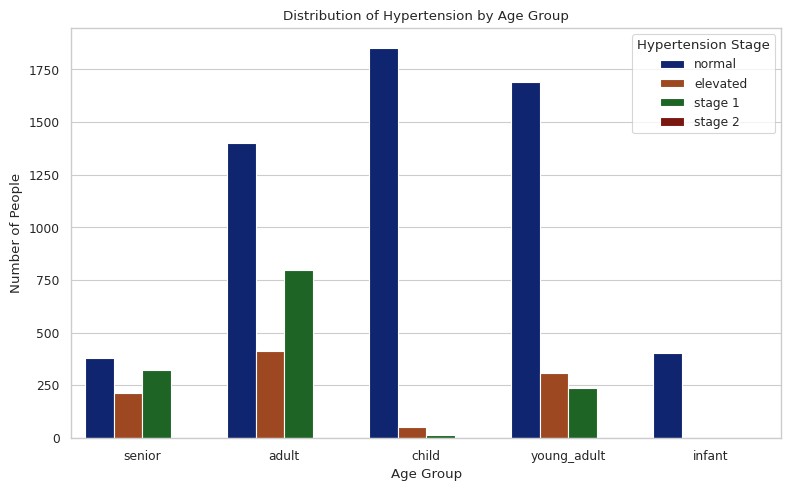

In [ ]:
sns.set(style="whitegrid")
sns.set_context('paper')
plt.figure(figsize=(8, 5))

sns.countplot(
    data=merged_df,
    x='age_group',
    hue='hypertension',
    palette='dark',
    hue_order=['normal', 'elevated', 'stage 1', 'stage 2']
)

plt.title('Distribution of Hypertension by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Hypertension Stage')
plt.tight_layout()
plt.show()

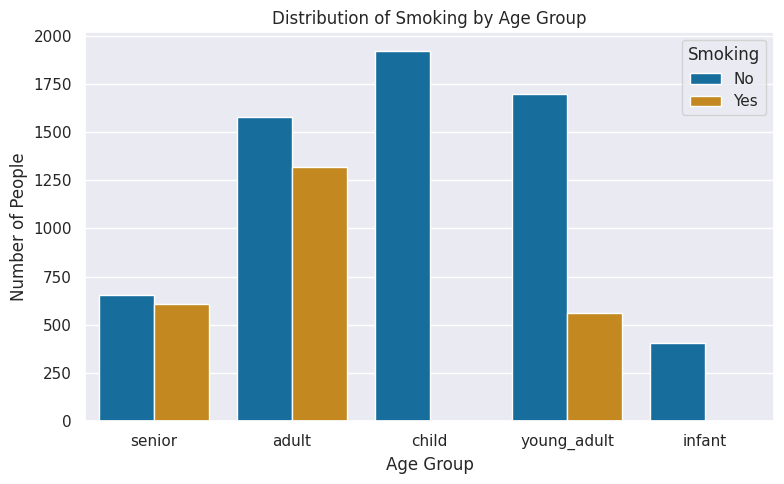

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

sns.countplot(data=merged_df, x='age_group', hue='Smoker', palette='colorblind')

plt.title('Distribution of Smoking by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Smoking', labels=['No','Yes'])
plt.tight_layout()
plt.show()

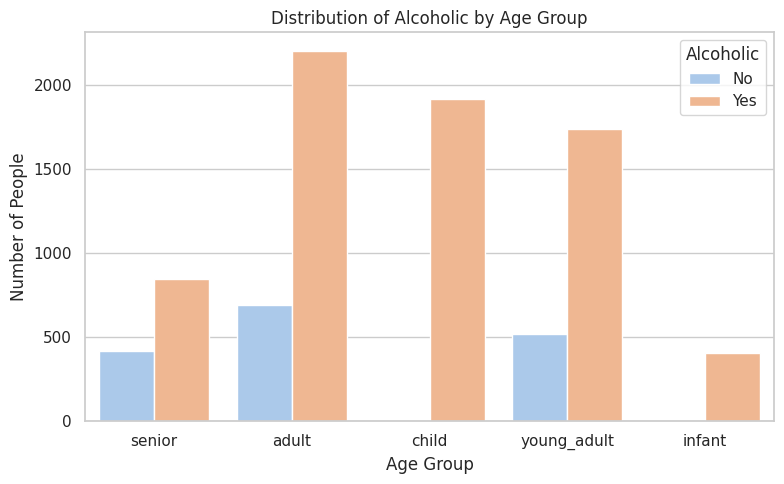

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.countplot(data=merged_df, x='age_group', hue='Alcoholic', palette='pastel')

plt.title('Distribution of Alcoholic by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Alcoholic', labels=['No','Yes'])
plt.tight_layout()
plt.show()

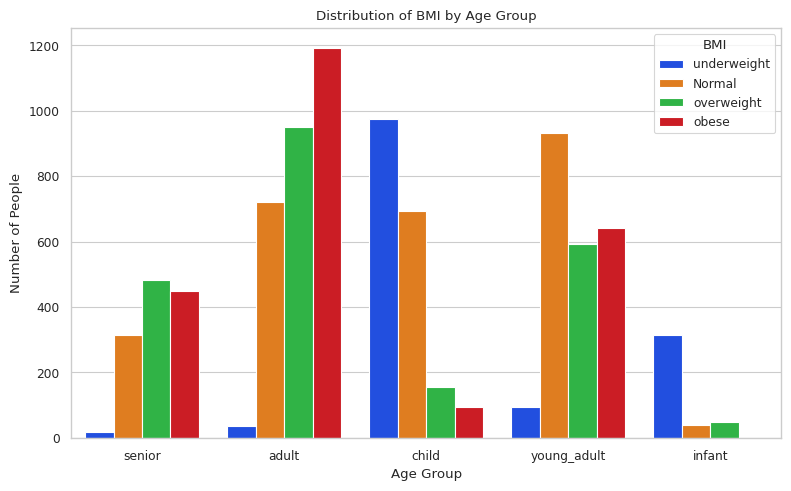

In [ ]:
sns.set(style="whitegrid")
sns.set_context('paper')
plt.figure(figsize=(8, 5))

sns.countplot(data=merged_df, x='age_group', hue='bmi_category', palette='bright')

plt.title('Distribution of BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='BMI', labels=['underweight','Normal','overweight', 'obese'])
plt.tight_layout()
plt.show()

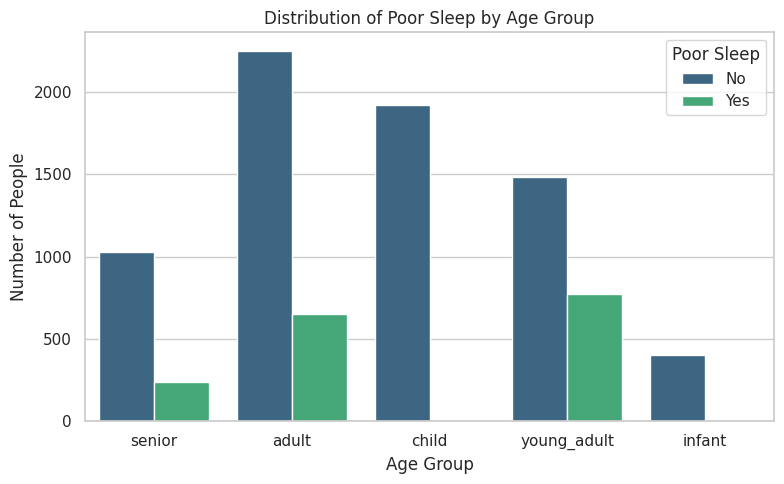

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.countplot(data=merged_df, x='age_group', hue='Poor_Sleep', palette='viridis')

plt.title('Distribution of Poor Sleep by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Poor Sleep', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [ ]:
num_col=merged_df.select_dtypes(include=['number'])
corr_mat=num_col.corr().abs()
upper=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
to_drop=[col for col in upper.columns if any(upper[col]>0.95)]
merged_df.drop(columns=to_drop,inplace=True)

In [ ]:
merged_df.shape


(8748, 1704)

In [ ]:
merged_df.to_csv('final_health_dataset.csv', index=False)
from google.colab import files
files.download('final_health_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>